In [1]:
%matplotlib
import pandas as pd


Using matplotlib backend: MacOSX


In [2]:
# Import dataset 
mv_df = pd.read_csv('cleaned_data.csv')
pd.set_option('display.max_columns', None)
mv_df.head()

,title,rated,released,runtime,director,writer,actors,plot,language,country,awards,metascore,imdbrating,imdbvotes,dvd,boxoffice,response,genre,star,budget,gross,year,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating
0,Inception,PG-13,2010-07-16,148,Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",A thief who steals corporate secrets through t...,"English, Japanese, French","United Kingdom, United States",Won 4 Oscars. 157 wins & 220 nominations total,74.0,8.8,2223702,07 Dec 2010,292576195.0,True,Action,Leonardo DiCaprio,160000000.0,836836967.0,2010,8.8,87.0,74.0
1,Iron Man 2,PG-13,2010-05-07,124,Jon Favreau,"Justin Theroux, Stan Lee, Don Heck","Robert Downey Jr., Mickey Rourke, Gwyneth Paltrow",With the world now aware of his identity as Ir...,"English, French, Russian",United States,Nominated for 1 Oscar. 7 wins & 44 nominations...,57.0,7.0,771885,17 Aug 2010,312433331.0,True,Action,Robert Downey Jr.,200000000.0,623933331.0,2010,7.0,72.0,57.0
2,Shutter Island,R,2010-02-19,138,Martin Scorsese,"Laeta Kalogridis, Dennis Lehane","Leonardo DiCaprio, Emily Mortimer, Mark Ruffalo","In 1954, a U.S. Marshal investigates the disap...","English, German",United States,11 wins & 66 nominations,63.0,8.2,1225928,08 Jun 2010,128012934.0,True,Mystery,Leonardo DiCaprio,80000000.0,294805697.0,2010,8.2,68.0,63.0
3,Scott Pilgrim vs. the World,PG-13,2010-08-13,112,Edgar Wright,"Michael Bacall, Edgar Wright, Bryan Lee O'Malley","Michael Cera, Mary Elizabeth Winstead, Kieran ...","In a magically realistic version of Toronto, a...",English,"United States, United Kingdom, Canada, Japan",17 wins & 64 nominations,69.0,7.5,409720,09 Nov 2010,32777690.0,True,Action,Michael Cera,60000000.0,48917974.0,2010,7.5,82.0,69.0
4,Grown Ups,PG-13,2010-06-25,102,Dennis Dugan,"Adam Sandler, Fred Wolf","Adam Sandler, Salma Hayek, Kevin James",After their high school basketball coach passe...,"English, Spanish",United States,3 wins & 4 nominations,30.0,6.0,242283,09 Nov 2010,162001186.0,True,Comedy,Adam Sandler,80000000.0,271457301.0,2010,6.0,11.0,30.0


In [3]:
mv_df['profit'] = mv_df['gross']- mv_df['budget']

In [4]:
# Check for any nulls
mv_df.isnull().sum()

title                               0
rated                              21
released                            0
runtime                             0
director                            8
writer                              3
actors                              0
plot                                0
language                            3
country                             1
awards                            120
metascore                          88
imdbrating                          0
imdbvotes                           0
dvd                                38
boxoffice                          30
response                            0
genre                               0
star                                0
budget                            422
gross                               7
year                                0
internet_movie_database_rating      0
rotten_tomato_rating                0
metacritic_rating                   0
profit                            425
dtype: int64

In [5]:
# Count number of row
print(len(mv_df))

1774


In [6]:
# Print out all columns
mv_df.columns

Index(['title', 'rated', 'released', 'runtime', 'director', 'writer', 'actors',
       'plot', 'language', 'country', 'awards', 'metascore', 'imdbrating',
       'imdbvotes', 'dvd', 'boxoffice', 'response', 'genre', 'star', 'budget',
       'gross', 'year', 'internet_movie_database_rating',
       'rotten_tomato_rating', 'metacritic_rating', 'profit'],
      dtype='object')

In [7]:
# Select columns for ML models
cols = [ 'rated','metascore', 'imdbrating','imdbvotes','genre', 'star', 
        'internet_movie_database_rating',
       'rotten_tomato_rating', 'metacritic_rating', 'profit']

In [8]:
mv_drop_df = mv_df[cols].copy()
mv_drop_df

,rated,metascore,imdbrating,imdbvotes,genre,star,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating,profit
0,PG-13,74.0,8.8,2223702,Action,Leonardo DiCaprio,8.8,87.0,74.0,676836967.0
1,PG-13,57.0,7.0,771885,Action,Robert Downey Jr.,7.0,72.0,57.0,423933331.0
2,R,63.0,8.2,1225928,Mystery,Leonardo DiCaprio,8.2,68.0,63.0,214805697.0
3,PG-13,69.0,7.5,409720,Action,Michael Cera,7.5,82.0,69.0,-11082026.0
4,PG-13,30.0,6.0,242283,Comedy,Adam Sandler,6.0,11.0,30.0,191457301.0
...,...,...,...,...,...,...,...,...,...,...
1769,Not Rated,NaN,5.8,606,Action,Tony Ka Fai Leung,5.8,75.0,0.0,NaN
1770,NaN,NaN,4.7,185,Family,Cole Allen,4.7,60.0,0.0,NaN
1771,R,NaN,3.0,145,Action,Michael Saquella,3.0,0.0,0.0,NaN
1772,NaN,NaN,4.8,1602,Drama,Alexandra Bokova,4.8,0.0,0.0,NaN


In [9]:
# Drop any nulls 
mv_drop_df = mv_drop_df.dropna()
mv_drop_df

,rated,metascore,imdbrating,imdbvotes,genre,star,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating,profit
0,PG-13,74.0,8.8,2223702,Action,Leonardo DiCaprio,8.8,87.0,74.0,676836967.0
1,PG-13,57.0,7.0,771885,Action,Robert Downey Jr.,7.0,72.0,57.0,423933331.0
2,R,63.0,8.2,1225928,Mystery,Leonardo DiCaprio,8.2,68.0,63.0,214805697.0
3,PG-13,69.0,7.5,409720,Action,Michael Cera,7.5,82.0,69.0,-11082026.0
4,PG-13,30.0,6.0,242283,Comedy,Adam Sandler,6.0,11.0,30.0,191457301.0
...,...,...,...,...,...,...,...,...,...,...
1712,PG,17.0,6.7,4563,Drama,Alex Kendrick,6.7,56.0,17.0,33026103.0
1714,PG-13,39.0,4.5,4260,Comedy,Tyler Perry,4.5,11.0,39.0,54747725.0
1718,PG-13,52.0,5.9,7082,Drama,Yara Shahidi,5.9,52.0,52.0,-2249971.0
1729,R,10.0,5.9,13623,Biography,Ashley Bratcher,5.9,42.0,10.0,15354152.0


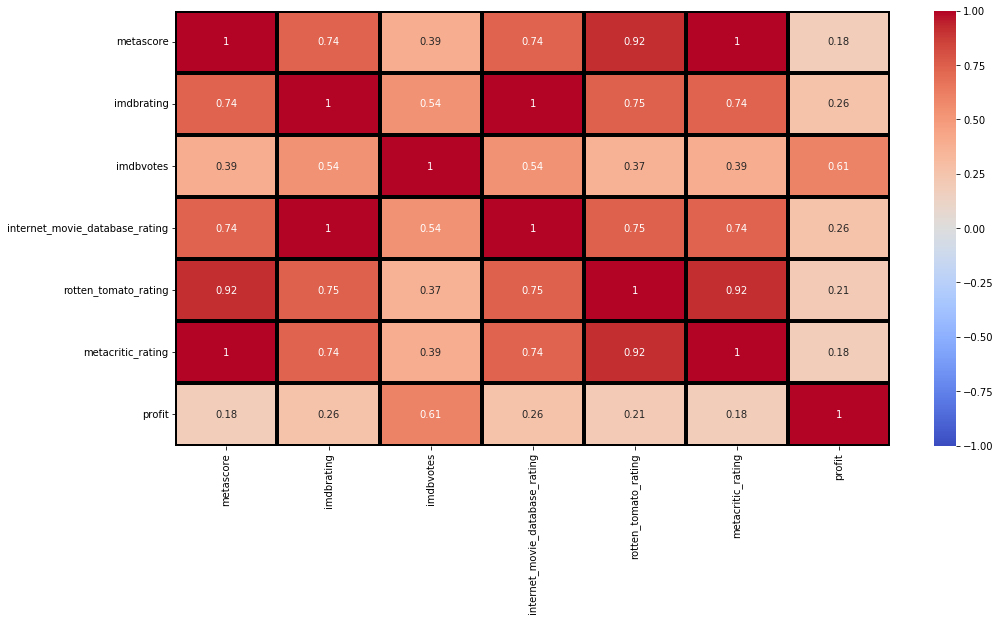

In [114]:
# Explore correlation between features via a heatmap
import seaborn as sns
fix, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(mv_drop_df.corr(), annot=True, vmin=-1, vmax=1, center =0, cmap = 'coolwarm', linewidths=3, linecolor='black',)

In [10]:
mv_drop_df.rated.value_counts()

R            591
PG-13        537
PG           181
G             11
Not Rated      9
TV-MA          2
NC-17          1
Unrated        1
Name: rated, dtype: int64

In [11]:
mv_drop_df.star.value_counts()

Mark Wahlberg            13
Steve Carell             12
Matt Damon               12
Matthew McConaughey      12
Liam Neeson              10
                         ..
Kristen Connolly          1
Zoe Margaret Colletti     1
John Krasinski            1
Jacob Tremblay            1
Oakes Fegley              1
Name: star, Length: 647, dtype: int64

In [13]:
# Check categorical data
print(mv_drop_df.genre.nunique())
print(mv_drop_df.rated.nunique())
print(mv_drop_df.star.nunique())

13
8
647


In [16]:
import seaborn as sns = mv_drop_df.copy()

In [17]:
# Encode categorical data to numerical
mv_encoded = pd.get_dummies(mv_red_df)
mv_encoded.shape

(1333, 675)

In [18]:
# Standardize the datset
from sklearn.preprocessing import StandardScaler,MinMaxScaler

mv_scaled = StandardScaler().fit_transform(mv_encoded)
mv_scaled

array([[ 1.0686757 ,  2.63064981,  9.88729825, ..., -0.02739983,
        -0.02739983, -0.04749357],
       [ 0.08921119,  0.55570532,  2.88224206, ..., -0.02739983,
        -0.02739983, -0.04749357],
       [ 0.43490454,  1.93900165,  5.07301178, ..., -0.02739983,
        -0.02739983, -0.04749357],
       ...,
       [-0.19886661, -0.71231632, -0.80795304, ..., -0.02739983,
        -0.02739983, -0.04749357],
       [-2.6187201 , -0.71231632, -0.77639254, ..., -0.02739983,
        -0.02739983, -0.04749357],
       [ 0.55013566, -0.25121754, -0.76702234, ..., -0.02739983,
        -0.02739983, -0.04749357]])

## Unsupervised algorithm

In [19]:
# PCA dimentional reduction
from sklearn.decomposition import PCA
mv_pca = PCA(n_components=0.9).fit_transform(mv_scaled)
mv_pca.shape


(1333, 586)

In [20]:
# Create PCA dataframe
mv_pca_df = pd.DataFrame(data=mv_pca, index=mv_encoded.index)
mv_pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585
0,-6.602431,4.627271,-3.460395,-3.188913,-0.679217,-0.194191,-0.549990,-0.192562,0.057237,0.737604,0.035507,0.665166,0.368090,-3.049799,4.907995,-1.665766,0.054590,0.400823,-0.345933,-0.571352,0.178253,-0.519880,6.084190,0.728817,0.207704,-0.106902,0.265798,0.164367,-0.177242,-0.610653,-0.101166,0.438733,-0.680049,0.464195,-0.791904,-0.423514,-0.639041,0.461831,1.224342,0.266704,-0.444512,-0.092538,-0.062826,-0.457685,0.565484,-0.674219,-0.579534,-0.149285,0.826792,-1.175237,-0.716449,1.255735,-1.830651,1.035479,1.578272,-0.090120,-5.321353,0.293828,-0.828698,1.306192,-0.973787,0.525307,-2.392237,0.364237,-0.174054,0.796460,0.540068,1.387364,-1.658179,-6.307619,0.159874,-0.360548,0.056686,-0.147360,1.286535,1.865811,0.246857,0.759507,-0.570435,-1.016170,-1.901074,-1.811539,1.733985,4.696471e-12,-2.625260e-12,-1.758134e-13,-3.271902e-13,-4.067326e-12,3.688482e-13,1.526375e-13,5.676028e-12,-2.597716e-12,8.108808e-12,1.575216e-12,-1.611102e-12,-1.059273e-12,-2.087901e-12,3.758041e-12,-2.277931e-12,-9.831009e-13,-2.820388e-12,-6.726504e-13,-3.391207e-12,3.980896e-13,-0.096129,-0.098234,-0.067723,-0.391093,0.153267,-0.314918,-0.044852,0.921736,-0.381333,1.271761,-0.505962,-0.422986,0.873690,0.855268,-0.354079,-1.408340e-13,2.036145e-13,-9.480240e-13,2.658005e-13,-9.257525e-13,-3.269721e-13,1.669560e-12,-9.112244e-13,1.959106e-12,1.494272e-12,9.448220e-13,4.656899e-13,5.965374e-13,1.232133e-12,-2.141495e-12,1.316947e-12,1.310300e-12,1.195342e-12,1.031915e-11,1.721727e-12,2.623449e-13,1.258513e-12,9.357232e-14,-0.028429,-0.079536,0.143921,-0.021808,-0.243162,-0.084880,0.282290,-0.279770,-0.537193,-0.327016,0.285677,0.155914,-0.498899,-0.030212,-0.213285,-0.539314,-0.709355,-0.019363,1.080257e-12,-2.107003e-13,-4.180452e-13,-1.014759e-13,4.022

In [21]:
# Try t-SNE
from sklearn.manifold import TSNE
tsne_features = TSNE(learning_rate=200).fit_transform(mv_pca_df)
tsne_features.shape

(1333, 2)

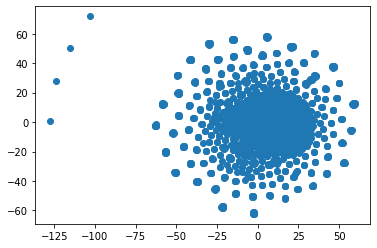

In [22]:
# Preview the classification
import matplotlib.pyplot as plt

plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [23]:
# Trying K-means
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values

for i in k:
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(tsne_features)
  inertia.append(km.inertia_)

# Create the Elbow curve using hvPlot
elbow_data = {'k': k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df

,k,inertia
0,1,1.620787e+06
1,2,1.087475e+06
2,3,7.548979e+05
3,4,5.990075e+05
4,5,4.916451e+05
5,6,4.025882e+05
6,7,3.562158e+05
7,8,3.086821e+05
8,9,2.783299e+05
9,10,2.542608e+05


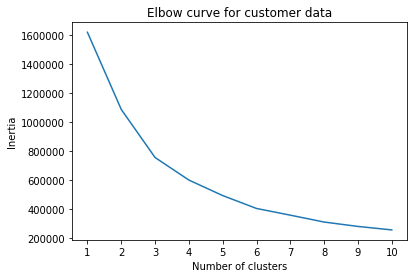

In [24]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [25]:
# Initialize the k-means model, using k=4
model = KMeans(n_clusters=3, random_state=0)
model.fit(tsne_features)

# Predict clusters
preds = model.predict(tsne_features)
preds

array([2, 2, 2, ..., 1, 1, 0], dtype=int32)

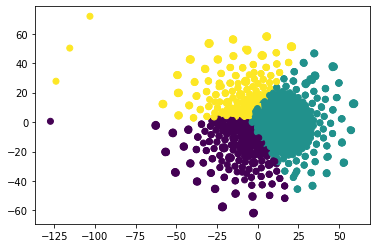

In [26]:
# Plot T-SNE reduced dimentions results with labels
plt.scatter(tsne_features[:, 0], tsne_features[:,1], c = model.labels_ )
plt.show()

## Another unsupervised learning

In [27]:
mv_unsup_df = mv_red_df.copy()

In [28]:
mv_unsup_df

,rated,metascore,imdbrating,imdbvotes,genre,star,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating,profit
0,PG-13,74.0,8.8,2223702,Action,Leonardo DiCaprio,8.8,87.0,74.0,676836967.0
1,PG-13,57.0,7.0,771885,Action,Robert Downey Jr.,7.0,72.0,57.0,423933331.0
2,R,63.0,8.2,1225928,Mystery,Leonardo DiCaprio,8.2,68.0,63.0,214805697.0
3,PG-13,69.0,7.5,409720,Action,Michael Cera,7.5,82.0,69.0,-11082026.0
4,PG-13,30.0,6.0,242283,Comedy,Adam Sandler,6.0,11.0,30.0,191457301.0
...,...,...,...,...,...,...,...,...,...,...
1712,PG,17.0,6.7,4563,Drama,Alex Kendrick,6.7,56.0,17.0,33026103.0
1714,PG-13,39.0,4.5,4260,Comedy,Tyler Perry,4.5,11.0,39.0,54747725.0
1718,PG-13,52.0,5.9,7082,Drama,Yara Shahidi,5.9,52.0,52.0,-2249971.0
1729,R,10.0,5.9,13623,Biography,Ashley Bratcher,5.9,42.0,10.0,15354152.0


In [29]:
stars  = mv_unsup_df['star'].value_counts()

In [30]:
stars_filtered = stars[stars>2]
stars_filtered

Mark Wahlberg           13
Steve Carell            12
Matt Damon              12
Matthew McConaughey     12
Liam Neeson             10
                        ..
Jeremy Renner            3
Amy Poehler              3
Zoey Deutch              3
Jason Sudeikis           3
Benedict Cumberbatch     3
Name: star, Length: 140, dtype: int64

In [31]:
# Cutting some data from star column
stars_replace = stars[stars<2].index.to_list()

for star in stars_replace:
  mv_unsup_df['star'] = mv_unsup_df['star'].replace(star, 'other')
mv_unsup_df['star'].value_counts()

other                  404
Mark Wahlberg           13
Steve Carell            12
Matt Damon              12
Matthew McConaughey     12
                      ... 
Kate Mara                2
Patrick Stewart          2
Mandy Moore              2
Patrick Wilson           2
Mel Gibson               2
Name: star, Length: 244, dtype: int64

In [32]:
# Encode categorical data to numerical
mv_converted = pd.get_dummies(mv_unsup_df)
mv_converted.shape

(1333, 272)

In [33]:
# Standardize the datset

mv_scaled = StandardScaler().fit_transform(mv_converted)
mv_scaled

array([[ 1.0686757 ,  2.63064981,  9.88729825, ..., -0.04749357,
        -0.04749357, -0.65945145],
       [ 0.08921119,  0.55570532,  2.88224206, ..., -0.04749357,
        -0.04749357, -0.65945145],
       [ 0.43490454,  1.93900165,  5.07301178, ..., -0.04749357,
        -0.04749357, -0.65945145],
       ...,
       [-0.19886661, -0.71231632, -0.80795304, ..., -0.04749357,
        -0.04749357,  1.51641187],
       [-2.6187201 , -0.71231632, -0.77639254, ..., -0.04749357,
        -0.04749357,  1.51641187],
       [ 0.55013566, -0.25121754, -0.76702234, ..., -0.04749357,
        -0.04749357,  1.51641187]])

In [34]:
# PCA dimentional reduction

mv_pca = PCA(n_components=0.9).fit_transform(mv_scaled)
mv_pca.shape


(1333, 229)

In [35]:
# Create PCA dataframe
mv_pca_df = pd.DataFrame(data=mv_pca, index=mv_converted.index)
mv_pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228
0,7.019096,5.631961,-2.154890,2.977749,-1.716768,-1.820084,3.740811,2.068889,-0.462809,0.753722,0.557048,0.187978,-0.353039,1.930218,-0.066695,-0.731389,-1.730081,1.937722,0.979652,-3.078446,-0.461833,5.215070,3.668331,0.257913,0.466272,0.058980,0.382083,0.254882,-0.107549,-0.455619,-0.364062,-0.420845,1.357788,-0.344109,0.281793,-1.171529,-0.766233,1.206345,0.666382,0.849459,0.432746,-0.159711,-0.218931,-0.396648,-0.310167,-0.028110,-0.164289,1.425311,0.298811,-1.707845,1.197216,0.900670,-1.059830,1.263928,1.570766,-0.249530,-0.816565,1.153917,-2.758855,0.291573,-2.659652,-1.573616,-3.273478,0.072526,0.798268,1.036272,0.190299,-1.597312,-0.566153,2.461125,0.610718,2.554917,-0.231457,-0.476134,1.000697,2.785676,-1.874311,0.609879,-3.079239,1.159924,-0.086357,1.522080,1.517168,3.110370e-12,-1.991289e-12,-3.556689e-12,-2.119529e-12,1.451892e-12,-4.806571e-12,-7.831348e-12,-1.671821e-12,-5.806235e-12,4.572139e-12,2.706134e-12,2.870102e-12,5.010690e-13,5.158483e-13,-4.011248e-12,4.431252e-13,-4.176896e-12,2.585489e-12,-3.025665e-12,-9.144771e-13,-2.818216e-12,-0.281790,-0.160837,-0.239399,-0.574157,0.180013,-0.743896,0.092675,1.801826,-0.436858,1.140739,-0.312189,-1.138137,0.116358,-0.308399,-0.160044,-2.912313e-12,-2.098474e-12,-2.394392e-12,7.545704e-13,-7.784747e-14,-1.569314e-12,-7.680127e-14,-7.062071e-13,2.790446e-13,1.601715e-12,-2.661588e-12,5.183293e-13,-1.313531e-12,3.893800e-13,3.537962e-12,-1.047018e-12,-9.004948e-13,-1.011494e-12,-4.093309e-12,-5.534764e-13,-5.652066e-13,2.910681e-12,2.574816e-12,-0.122239,-0.369026,0.519300,0.189835,-0.505077,0.184764,-0.781693,-0.025157,-0.386075,0.057891,-0.429744,-0.782310,-0.376908,-0.267437,-0.367080,-0.266516,-0.003074,-1.362873e-12,-6.581511e-13,6.813333e-13,4.350912e-13,-3.469891e-13,4.322707e-14,1.072437e-13,-1.851728e-13,4.462149e-14,-4.821529e-13,-7.626218e-13,6.469482e-13,4.855439e-13,-5.475006e-13,8.813377e-14,1.745443e-12,-1.346449e-12,-1.836516e-13,2.802470e-13,6.194084e-14,5.276142e-13,-7.621781e-13,-9.355300e-14,-2.050750e-13,-1.158717e-13,-2.193995e-13,8.208072e-14,-2.754616e-13,2.568271e-13,4.726772e-14,-7.089643e-13,9.702797e-13,-1.069315e-12,-9.674433e-13,-1.426113e-16,-3.765651e-13,3.416016e-13,1.437601e-12,1.143235e-12,-7.347967e-13,2.052810e-13,1.675683e-13,9.903562e-16,-9.643058e-13,-8.404875e-13,1.776620e-13,-2.910221e-13,2.601230e-13,6.936534e-13,-6.633920e-13,1.346251e-13,-6.034042e-14,-3.637222e-13,4.545180e-13,2.755884e-13,-1.881328e-12,-1.345617e-13,-7.021863e-13,-1.317142e-12,-4.043505e-13,-1.799754e-13,2.998006e-13,6.400395e-13,1.189695e-13,-1.010480e-13,8.239763e-14,-1.882469e-13,-1.121685e-12,-2.359108e-13,-4.669410e-13
1,2.142021,4.557430,-1.115254,1.689297,-0.756277,-0.291995,-0.439807,0.987941,-0.856835,1.248483,0.634339,-0.023254,-0.518668,1.168736,-0.869962,-0.052955,-1.604180,1.662531,0.308913,-0.518007,-0.934601,-2.064918,-0.233757,-0.849053,-1.259217,-0.395333,0.014894,0.269617,-2.113497,4.805404,-0.193121,0.616354,-1.458755,-0.083864,-0.599836,-0.482771,3.084419,-4.096854,-1.871051,-2.031834,-1.611085,1.479016,-0.733598,-0.251767,2.048470,1.091612,0.069912,-0.027763,-0.338034,0.732087,-0.113078,-0.199301,0.360575,1.763742,1.537866,-1.569401,0.048897

In [36]:
# Try t-SNE
from sklearn.manifold import TSNE
tsne_features = TSNE(learning_rate=200).fit_transform(mv_pca_df)
tsne_features.shape

(1333, 2)

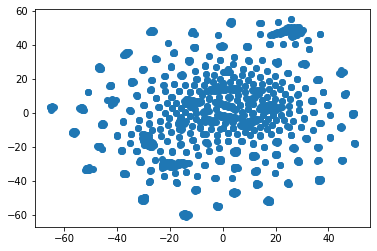

In [37]:

plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [38]:
# Trying K-means
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values

for i in k:
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(tsne_features)
  inertia.append(km.inertia_)

# Create the Elbow curve using hvPlot
elbow_data = {'k': k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df

,k,inertia
0,1,1.633967e+06
1,2,1.016195e+06
2,3,7.026478e+05
3,4,5.306896e+05
4,5,4.314209e+05
5,6,3.526471e+05
6,7,2.965326e+05
7,8,2.629045e+05
8,9,2.347686e+05
9,10,2.080588e+05


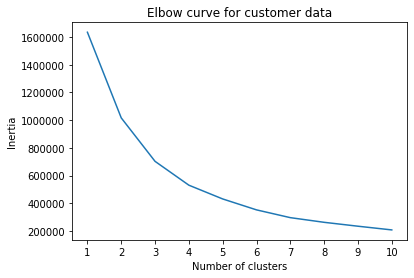

In [39]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [40]:
# Initialize the k-means model, using k=3
model = KMeans(n_clusters=3, random_state=0)
model.fit(tsne_features)

# Predict clusters
preds = model.predict(tsne_features)
preds

array([1, 1, 1, ..., 0, 0, 1], dtype=int32)

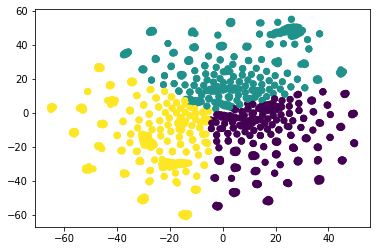

In [41]:
# Plot T-SNE reduced dimentions results with labels
plt.scatter(tsne_features[:, 0], tsne_features[:,1], c = model.labels_ )
plt.show()

In [42]:
# Try dendrogram ploting to see potentials clusters
from scipy.cluster.hierarchy import dendrogram, linkage

In [43]:
# Perform hierarchical clustering
mergings = linkage(mv_pca_df, method='ward')

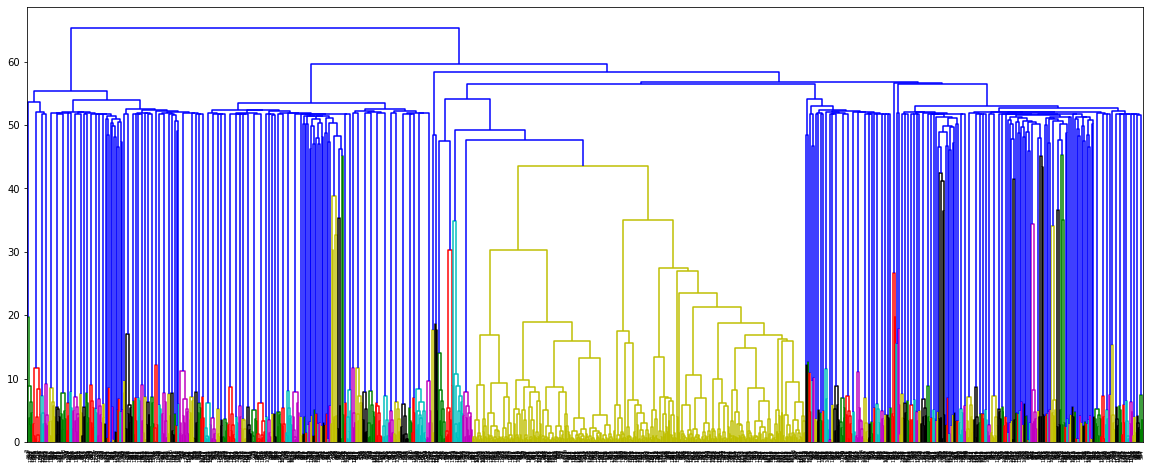

In [44]:
# Generate a dendrogram
plt.figure(figsize=(20,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

## Third attempt: unsupervised learning

In [45]:
mv_unsup_3_df = mv_unsup_df.copy()

In [46]:
# drop some more columns
mv_unsup_3_df = mv_unsup_3_df.drop(columns=['star'])
mv_unsup_3_df

,rated,metascore,imdbrating,imdbvotes,genre,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating,profit
0,PG-13,74.0,8.8,2223702,Action,8.8,87.0,74.0,676836967.0
1,PG-13,57.0,7.0,771885,Action,7.0,72.0,57.0,423933331.0
2,R,63.0,8.2,1225928,Mystery,8.2,68.0,63.0,214805697.0
3,PG-13,69.0,7.5,409720,Action,7.5,82.0,69.0,-11082026.0
4,PG-13,30.0,6.0,242283,Comedy,6.0,11.0,30.0,191457301.0
...,...,...,...,...,...,...,...,...,...
1712,PG,17.0,6.7,4563,Drama,6.7,56.0,17.0,33026103.0
1714,PG-13,39.0,4.5,4260,Comedy,4.5,11.0,39.0,54747725.0
1718,PG-13,52.0,5.9,7082,Drama,5.9,52.0,52.0,-2249971.0
1729,R,10.0,5.9,13623,Biography,5.9,42.0,10.0,15354152.0


In [49]:
rates = mv_unsup_3_df.rated.value_counts()
rates

R            591
PG-13        537
PG           181
G             11
Not Rated      9
TV-MA          2
NC-17          1
Unrated        1
Name: rated, dtype: int64

In [51]:
# Cutting some data from star column
rates_replace = rates[rates<10].index.to_list()

for r in rates_replace:
  mv_unsup_3_df['rated'] = mv_unsup_3_df['rated'].replace(r, 'other')
mv_unsup_3_df['rated'].value_counts()

R        591
PG-13    537
PG       181
other     13
G         11
Name: rated, dtype: int64

In [52]:
# Encode categorical data to numerical
mv_converted = pd.get_dummies(mv_unsup_3_df)
mv_converted.shape

(1333, 25)

In [53]:
# Standardize the datset

mv_scaled = StandardScaler().fit_transform(mv_converted)
mv_scaled

array([[ 1.0686757 ,  2.63064981,  9.88729825, ..., -0.03876377,
        -0.02739983, -0.04749357],
       [ 0.08921119,  0.55570532,  2.88224206, ..., -0.03876377,
        -0.02739983, -0.04749357],
       [ 0.43490454,  1.93900165,  5.07301178, ..., -0.03876377,
        -0.02739983, -0.04749357],
       ...,
       [-0.19886661, -0.71231632, -0.80795304, ..., -0.03876377,
        -0.02739983, -0.04749357],
       [-2.6187201 , -0.71231632, -0.77639254, ..., -0.03876377,
        -0.02739983, -0.04749357],
       [ 0.55013566, -0.25121754, -0.76702234, ..., -0.03876377,
        -0.02739983, -0.04749357]])

In [54]:
# PCA dimentional reduction

mv_pca = PCA(n_components=0.9).fit_transform(mv_scaled)
mv_pca.shape


(1333, 16)

In [55]:
# Create PCA dataframe
mv_pca_df = pd.DataFrame(data=mv_pca, index=mv_converted.index)
mv_pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-6.409430,5.262993,-2.884326,2.858254,-0.630632,0.307002,-1.106484,0.457175,0.007852,0.717273,-0.127221,-0.078056,-0.123511,-0.049330,0.390102,-1.180810
1,-1.577755,2.956884,-1.510543,0.982437,-0.098743,0.160327,-0.154339,0.021977,-0.011696,-0.095867,-0.027168,-0.022288,-0.050894,0.051180,0.170138,-0.293972
2,-3.877531,0.755607,-1.794585,3.455790,-0.779398,-0.317662,-2.245076,1.167440,-1.974709,16.472769,-3.549224,0.036277,-0.457153,11.864449,1.878266,2.600345
3,-2.011209,1.485557,-1.397339,-0.122152,-0.023521,0.025242,0.362384,-0.293946,-0.090067,-0.318020,0.014432,0.039867,0.005543,-0.022898,0.126817,0.157433
4,2.516716,1.094137,-0.414543,-0.694068,-1.902532,0.809129,-0.390778,0.034142,0.494322,0.043054,-0.214083,-0.034391,0.018507,0.463265,-0.000533,-0.623756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,1.792628,0.134507,1.862887,-1.454174,1.507409,0.044519,-0.604781,-1.116152,-1.003734,0.921677,-0.237522,0.109304,0.406323,-0.465517,-0.002512,-0.758999
1714,3.923411,0.296081,-0.055618,-1.054963,-1.775545,0.844839,-0.372412,0.205498,0.533735,-0.432428,-0.113043,-0.057697,-0.033449,0.553283,0.022234,-0.275477
1718,1.086370,0.148731,-0.397641,-2.366199,1.159973,0.873957,-0.587437,-0.042957,-0.539344,0.315557,0.084418,-0.017831,-0.009916,-0.227469,-0.607304,-0.449045
1729,2.981282,-1.088801,0.004067,-0.192447,0.033267,-1.975150,2.544996,0.093830,-0.432587,0.677867,-0.244830,-0.076923,0.202855,0.053495,-0.464252,0.291661


In [56]:
# Try t-SNE
from sklearn.manifold import TSNE
tsne_features = TSNE(learning_rate=200).fit_transform(mv_pca_df)
tsne_features.shape

(1333, 2)

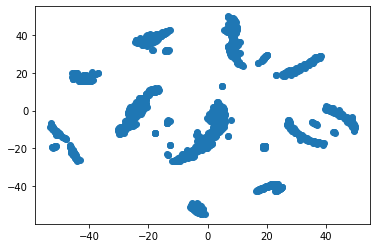

In [57]:

plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [58]:
# Trying K-means
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values

for i in k:
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(tsne_features)
  inertia.append(km.inertia_)

# Create the Elbow curve using hvPlot
elbow_data = {'k': k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df

,k,inertia
0,1,1.840552e+06
1,2,1.135028e+06
2,3,6.429504e+05
3,4,4.326680e+05
4,5,3.343520e+05
5,6,2.455140e+05
6,7,1.848838e+05
7,8,1.458376e+05
8,9,1.112376e+05
9,10,8.887481e+04


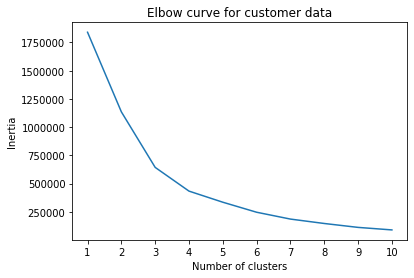

In [59]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [60]:
# Initialize the k-means model,
model = KMeans(n_clusters=4, random_state=0)
model.fit(tsne_features)

# Predict clusters
preds = model.predict(tsne_features)
preds

array([2, 2, 3, ..., 1, 0, 2], dtype=int32)

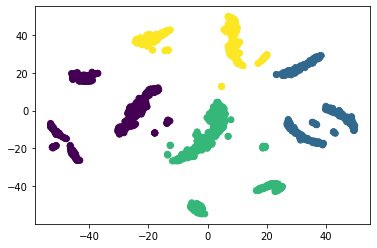

In [61]:
# Plot T-SNE reduced dimentions results with labels
plt.scatter(tsne_features[:, 0], tsne_features[:,1], c = model.labels_ )
plt.show()

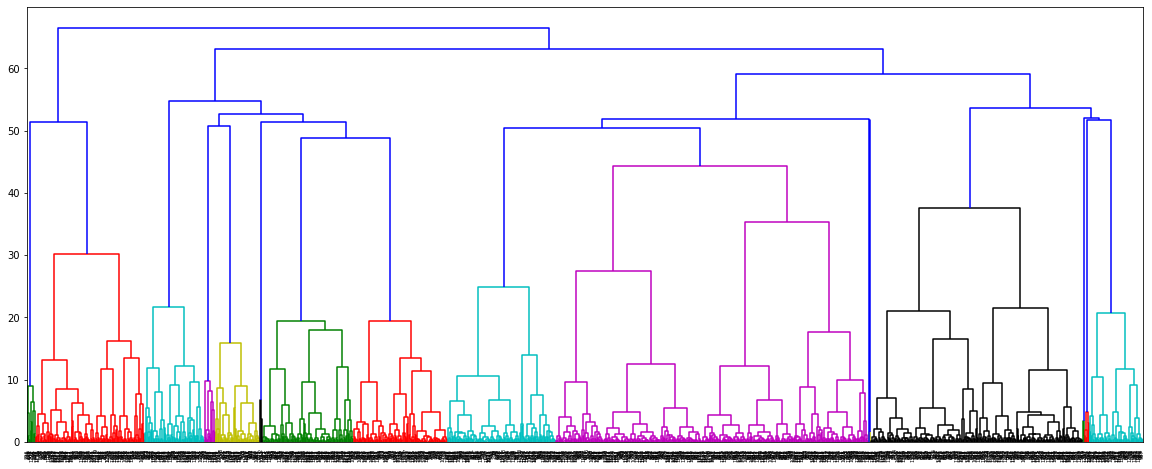

In [62]:
# Perform hierarchical clustering
mergings = linkage(mv_pca_df, method='ward')
# Generate a dendrogram
plt.figure(figsize=(20,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

## Deep Learning


In [63]:
# Split data into features and target
X = mv_encoded.drop(columns=['imdbrating'], axis=1)
y = mv_encoded['imdbrating'].values

In [64]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [65]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [66]:
# Check number of data points
n = len(X_train_scaled[0])
n

674

In [67]:

import tensorflow as tf
from tensorflow import keras
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# First hidden layer

nn.add(tf.keras.layers.Dense(units=17, activation='relu', input_dim=674))
# Second hidden layer

nn.add(tf.keras.layers.Dense(units=10, activation='relu'))
# Output layer

nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 17)                11475     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                180       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 11,666
Trainable params: 11,666
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Compile the model

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Train on 849 samples, validate on 150 samples
Epoch 1/100
849/849 [==============================] - 2s 2ms/sample - loss: -0.8452 - accuracy: 0.0000e+00 - val_loss: -3.5215 - val_accuracy: 0.0000e+00
Epoch 2/100
849/849 [==============================] - 0s 249us/sample - loss: -9.3448 - accuracy: 0.0000e+00 - val_loss: -8.1496 - val_accuracy: 0.0000e+00
Epoch 3/100
849/849 [==============================] - 0s 219us/sample - loss: -18.8772 - accuracy: 0.0000e+00 - val_loss: -14.2191 - val_accuracy: 0.0000e+00
Epoch 4/100
849/849 [==============================] - 0s 229us/sample - loss: -31.5827 - accuracy: 0.0000e+00 - val_loss: -22.7707 - val_accuracy: 0.0000e+00
Epoch 5/100
849/849 [==============================] - 0s 229us/sample - loss: -49.2578 - accuracy: 0.0000e+00 - val_loss: -34.8452 - val_accuracy: 0.0000e+00
Epoch 6/100
849/849 [==============================] - 0s 415us/sample - loss: -73.3678 - accuracy: 0.0000e+00 - val_loss: -51.4485 - val_accuracy: 0.0000e+00
Epoch 

In [70]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

334/1 - 0s - loss: -3.1681e+05 - accuracy: 0.0000e+00
Loss: -324266.6253742515, Accuracy: 0.0


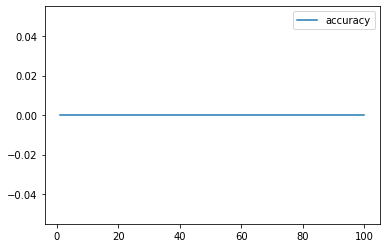

In [71]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

## Second attempt


In [72]:
# Drop more columns
mv_sec_df = mv_red_df.drop(columns=['star'])
mv_sec_df

,rated,metascore,imdbrating,imdbvotes,genre,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating,profit
0,PG-13,74.0,8.8,2223702,Action,8.8,87.0,74.0,676836967.0
1,PG-13,57.0,7.0,771885,Action,7.0,72.0,57.0,423933331.0
2,R,63.0,8.2,1225928,Mystery,8.2,68.0,63.0,214805697.0
3,PG-13,69.0,7.5,409720,Action,7.5,82.0,69.0,-11082026.0
4,PG-13,30.0,6.0,242283,Comedy,6.0,11.0,30.0,191457301.0
...,...,...,...,...,...,...,...,...,...
1712,PG,17.0,6.7,4563,Drama,6.7,56.0,17.0,33026103.0
1714,PG-13,39.0,4.5,4260,Comedy,4.5,11.0,39.0,54747725.0
1718,PG-13,52.0,5.9,7082,Drama,5.9,52.0,52.0,-2249971.0
1729,R,10.0,5.9,13623,Biography,5.9,42.0,10.0,15354152.0


In [73]:
# Encode categorical data to numerical
mv_encoded = pd.get_dummies(mv_sec_df)
mv_encoded.shape

(1333, 28)

In [74]:
# Split data into features and target
X = mv_encoded.drop(columns=['imdbrating'], axis=1)
y = mv_encoded['imdbrating'].values

In [75]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [76]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [77]:
# Check number of data points
n = len(X_train_scaled[0])
n

27

In [78]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# First hidden layer

nn.add(tf.keras.layers.Dense(units=52, activation='relu', input_dim=27))
# Second hidden layer

nn.add(tf.keras.layers.Dense(units=30, activation='relu'))
# Output layer

nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Check the structure of the model
nn.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 52)                1456      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1590      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 3,077
Trainable params: 3,077
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Compile the model

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Train on 849 samples, validate on 150 samples
Epoch 1/100
849/849 [==============================] - 2s 3ms/sample - loss: -4.9805 - accuracy: 0.0000e+00 - val_loss: -10.6281 - val_accuracy: 0.0000e+00
Epoch 2/100
849/849 [==============================] - 0s 200us/sample - loss: -17.8427 - accuracy: 0.0000e+00 - val_loss: -27.5395 - val_accuracy: 0.0000e+00
Epoch 3/100
849/849 [==============================] - 0s 193us/sample - loss: -41.5977 - accuracy: 0.0000e+00 - val_loss: -60.2791 - val_accuracy: 0.0000e+00
Epoch 4/100
849/849 [==============================] - 0s 182us/sample - loss: -86.0004 - accuracy: 0.0000e+00 - val_loss: -120.5711 - val_accuracy: 0.0000e+00
Epoch 5/100
849/849 [==============================] - 0s 338us/sample - loss: -162.3507 - accuracy: 0.0000e+00 - val_loss: -218.1059 - val_accuracy: 0.0000e+00
Epoch 6/100
849/849 [==============================] - 0s 205us/sample - loss: -280.8824 - accuracy: 0.0000e+00 - val_loss: -371.2508 - val_accuracy: 0.0000e+0

In [81]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

334/1 - 0s - loss: -1.4078e+06 - accuracy: 0.0000e+00
Loss: -1509659.4116766467, Accuracy: 0.0


## Thrid attempt

In [100]:
# drop more colomns
mv_rd_df = mv_unsup_3_df.copy()
mv_rd_df

,rated,metascore,imdbrating,imdbvotes,genre,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating,profit
0,PG-13,74.0,8.8,2223702,Action,8.8,87.0,74.0,676836967.0
1,PG-13,57.0,7.0,771885,Action,7.0,72.0,57.0,423933331.0
2,R,63.0,8.2,1225928,Mystery,8.2,68.0,63.0,214805697.0
3,PG-13,69.0,7.5,409720,Action,7.5,82.0,69.0,-11082026.0
4,PG-13,30.0,6.0,242283,Comedy,6.0,11.0,30.0,191457301.0
...,...,...,...,...,...,...,...,...,...
1712,PG,17.0,6.7,4563,Drama,6.7,56.0,17.0,33026103.0
1714,PG-13,39.0,4.5,4260,Comedy,4.5,11.0,39.0,54747725.0
1718,PG-13,52.0,5.9,7082,Drama,5.9,52.0,52.0,-2249971.0
1729,R,10.0,5.9,13623,Biography,5.9,42.0,10.0,15354152.0


In [101]:
mv_rd_df = mv_rd_df.drop(columns=['rated','imdbvotes', 'profit'])
mv_rd_df

,metascore,imdbrating,genre,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating
0,74.0,8.8,Action,8.8,87.0,74.0
1,57.0,7.0,Action,7.0,72.0,57.0
2,63.0,8.2,Mystery,8.2,68.0,63.0
3,69.0,7.5,Action,7.5,82.0,69.0
4,30.0,6.0,Comedy,6.0,11.0,30.0
...,...,...,...,...,...,...
1712,17.0,6.7,Drama,6.7,56.0,17.0
1714,39.0,4.5,Comedy,4.5,11.0,39.0
1718,52.0,5.9,Drama,5.9,52.0,52.0
1729,10.0,5.9,Biography,5.9,42.0,10.0


In [102]:
# Encode categorical data to numerical
mv_encoded = pd.get_dummies(mv_rd_df)
mv_encoded.shape

(1333, 18)

In [103]:
# Split data into features and target
X = mv_encoded.drop(columns=['imdbrating'], axis=1)
y = mv_encoded['imdbrating'].values

In [104]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [105]:
# Check number of data points
n = len(X_train_scaled[0])
n

27

In [106]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# First hidden layer

nn.add(tf.keras.layers.Dense(units=52, activation='relu', input_dim=27))
# Second hidden layer

nn.add(tf.keras.layers.Dense(units=30, activation='relu'))
# Output layer

nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 52)                1456      
_________________________________________________________________
dense_13 (Dense)             (None, 30)                1590      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 31        
Total params: 3,077
Trainable params: 3,077
Non-trainable params: 0
_________________________________________________________________


In [107]:
# Compile the model

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [110]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train, epochs=200)

Train on 999 samples
Epoch 1/200
999/999 [==============================] - 0s 285us/sample - loss: -7961508.2773 - accuracy: 0.0000e+00
Epoch 2/200
999/999 [==============================] - 0s 147us/sample - loss: -8077360.4024 - accuracy: 0.0000e+00
Epoch 3/200
999/999 [==============================] - 0s 130us/sample - loss: -8194664.1682 - accuracy: 0.0000e+00
Epoch 4/200
999/999 [==============================] - 0s 149us/sample - loss: -8312811.8904 - accuracy: 0.0000e+00
Epoch 5/200
999/999 [==============================] - 0s 220us/sample - loss: -8430683.3894 - accuracy: 0.0000e+00
Epoch 6/200
999/999 [==============================] - 0s 146us/sample - loss: -8550123.4810 - accuracy: 0.0000e+00
Epoch 7/200
999/999 [==============================] - 0s 159us/sample - loss: -8670911.0370 - accuracy: 0.0000e+00
Epoch 8/200
999/999 [==============================] - 0s 159us/sample - loss: -8792097.4945 - accuracy: 0.0000e+00
Epoch 9/200
999/999 [==============================

In [109]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

334/1 - 0s - loss: -7.2908e+06 - accuracy: 0.0000e+00
Loss: -7836493.27245509, Accuracy: 0.0
